In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 3.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=56ecbc8f84b225bdea5431a2c3867d49839dec5f499433fb5a7df10cee02ad2c
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


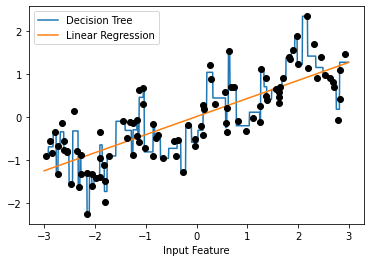

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
import mglearn

X, y = mglearn.datasets.make_wave(n_samples = 100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="Decision Tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="Linear Regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

In [3]:
# As you can see in the above model the Decision Tree Regression is a much powerful algorithm than Linear Regression therefore we use
# Decision Tree Regressor. To make the Linear Regression more powerful we can make use of the process called binning (discretization)
# which will split our input range into equally spaced intervals

bins = np.linspace(-3, 3, 11)
print("Bins: {}".format(bins))

Bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [4]:
# Now we will record for each data point which bin it falls into. This can be done using np.digitize function.

which_bin = np.digitize(X, bins=bins)
print("\nData Points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data Points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [5]:
# What we did here is tranform a single continouse feature into a categorical feature, that encodes which bin a data point is in.

# Now to use a scikit learn model on this data, we transform this discrete feature to a one-hot encoding using the OneHotEncoder from
# the preprocessing module. The OneHotEncoder works on Integer Feature rather than String Feature

from sklearn.preprocessing import OneHotEncoder

# Transforming using OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)

# Transform create the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [6]:
print("X_binned shape: {}".format(X_binned.shape))

X_binned shape: (100, 10)


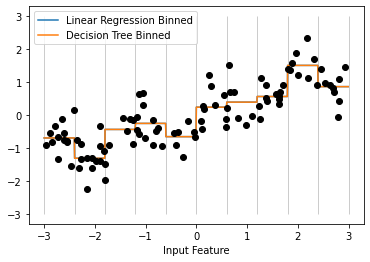

In [7]:
# Now we will build a new linear regression model and a new decision tree model on the one hot encoded data. This is visualized with 
# the help of the bin boundaries as black dotted lines

line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Linear Regression Binned")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Decision Tree Binned")


plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.xlabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

## Interactions and Polynomials

In [8]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


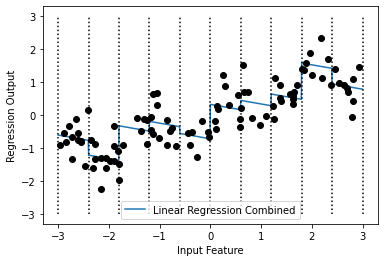

In [9]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="Linear Regression Combined")

for bin in bins:
  plt.plot([bin, bin], [-3, 3,], ':', c='k')
plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [10]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


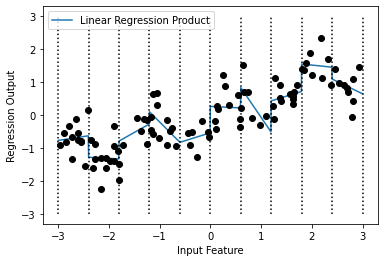

In [11]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label="Linear Regression Product")

for bin in bins:
  plt.plot([bin, bin], [-3, 3,], ':', c='k')

plt.legend(loc='upper left')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [12]:
# Using binning is 1 way to expand a continous feature. Another one is to use polynomials of the original features. For a given feature
# x, we can use x ** 2, x ** 3, x **4 and so on.

from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that is constantly 1.

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [13]:
print("X_poly shape: {}".format(X_poly.shape))

X_poly shape: (100, 10)


In [14]:
# Comparing X_poly entries with X.

print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [15]:
# Getting the feature names (Exponent of Features)

print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


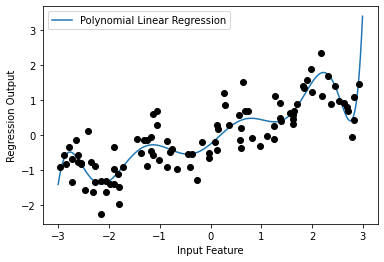

In [16]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='Polynomial Linear Regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

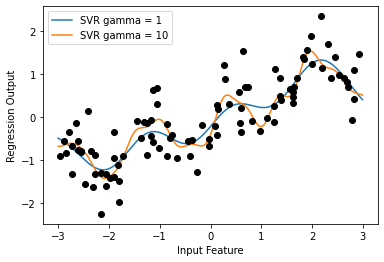

In [17]:
# Comparision with a Kernel SVM model on the original data, without any transformation

from sklearn.svm import SVR

for gamma in [1, 10]:
  svr = SVR(gamma=gamma).fit(X,y)
  plt.plot(line, svr.predict(line), label='SVR gamma = {}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

In [19]:
# Kernel SVM was able to produce similar kind of results to Polynomial Features and hence we will look at interactions and polynomials 
# from thr Boston Housing Dataset.

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# Rescaling the Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Now we will extract polynomial features and interactions up to a degeree of 2.

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [21]:
# Getting Feature names

print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [22]:
# Performing Ridge Regression with and without Interactions and Polynomials

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled,y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score with interactions: 0.621
Score with interactions: 0.753


In [23]:
# Peforming Random Forest with and without and Interations and Polynomials

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score with interactions: 0.796
Score with interactions: 0.753
